In [1]:
from agents import agent_loss, CAPM_Agent, MVP_Agent, Uniform_Agent
from trading_env.environment import TradingEnv

import dill
import random
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
with open('test_data.dill','rb') as dill_file:
    test_data = dill.load(dill_file)
test_dates = test_data['dates']
test_data = test_data['data']

env = TradingEnv(test_data)
n_stocks = env.n_stocks
start = env._start_tick

In [3]:
with open('dpm_agent.dill','rb') as dill_file:
    dpm_agent = dill.load(dill_file)

capm_agent = CAPM_Agent(n_stocks)
mvp_agent = MVP_Agent(n_stocks)
uniform_agent = Uniform_Agent(n_stocks)

In [4]:
env = TradingEnv(test_data)

dpm_loss = agent_loss(env,dpm_agent)
dpm_val_hist = env.portfolio_value_hist

capm_loss = agent_loss(env,capm_agent)
capm_val_hist = env.portfolio_value_hist

mvp_loss = agent_loss(env,mvp_agent)
mvp_val_hist = env.portfolio_value_hist

uniform_loss = agent_loss(env,uniform_agent)
uniform_val_hist = env.portfolio_value_hist


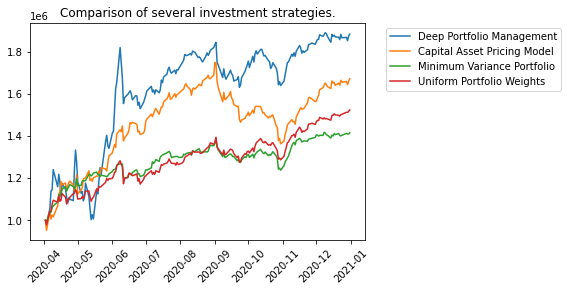

In [5]:
plt.plot(test_dates[start:],dpm_val_hist,label='Deep Portfolio Management')
plt.plot(test_dates[start:],capm_val_hist,label='Capital Asset Pricing Model')
plt.plot(test_dates[start:],mvp_val_hist,label='Minimum Variance Portfolio')
plt.plot(test_dates[start:],uniform_val_hist,label='Uniform Portfolio Weights')
plt.xticks(rotation=45)
plt.legend(loc='upper right',bbox_to_anchor=(1.6, 1) )
plt.title('Comparison of several investment strategies.')
plt.show()

In [6]:
TRIALS = 100
n_trialsize = 5

final_vals = {'DeepPortfolio':[],
              'CAPM':[],
              'MVP':[],
              'Uniform':[]}


capm_agent = CAPM_Agent(n_trialsize)
mvp_agent = MVP_Agent(n_trialsize)
uniform_agent = Uniform_Agent(n_trialsize)

for _ in range(TRIALS):

    sample_idx = random.sample(list(range(n_stocks)),n_trialsize)
    sample = test_data[sample_idx,:,:]

    env = TradingEnv(sample)


    dpm_loss = agent_loss(env,dpm_agent)
    final_vals['DeepPortfolio'].append(env.portfolio_value_hist[-1])

    capm_loss = agent_loss(env,capm_agent)
    final_vals['CAPM'].append(env.portfolio_value_hist[-1])

    mvp_loss = agent_loss(env,mvp_agent)
    final_vals['MVP'].append(env.portfolio_value_hist[-1])

    uniform_loss = agent_loss(env,uniform_agent)
    final_vals['Uniform'].append(env.portfolio_value_hist[-1])








In [ ]:
final_vals_df = pd.DataFrame(final_vals).astype(float)

sns.boxplot(data=final_vals_df)
plt.show()


In [ ]:
final_vals_df.hist()
plt.show()

In [ ]:
stats.ttest_rel(final_vals_df['DeepPortfolio'],final_vals_df['Uniform'] )

In [ ]:
stats.ttest_rel(final_vals_df['CAPM'],final_vals_df['Uniform'] )